# Setting

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
data_path = "/content/drive/MyDrive/Euron6th_interm/Week2/"

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
pio.templates.default = 'plotly_dark'
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
from sklearn.model_selection import train_test_split
print(check_output(["ls", data_path+"input"]).decode("utf8"))

X.npy
Y.npy



### From here (reshape process)

(-0.5, 63.5, 63.5, -0.5)

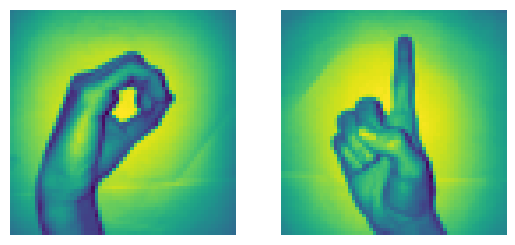

In [71]:
data_path = "/content/drive/MyDrive/Euron6th_interm/Week2/"

x_l = np.load(data_path + 'input/X.npy')
Y_l = np.load(data_path +'input/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [72]:
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


### Split into Trainset & Testset

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [74]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [75]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


# Logistic Regression

Artificial Neural Network (ANN)

### Initialize param

In [81]:
def dummy(param):
    dummy_param = param + 5
    return dummy_param
result = dummy(3)

def initialize_wb(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

### Forward Propagation

In [82]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [83]:
y_head = sigmoid(0)
y_head

0.5

In [84]:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

### Optimization - Back propagation

In [85]:
def forward_backward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]

    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [86]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [87]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

### Model Train

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


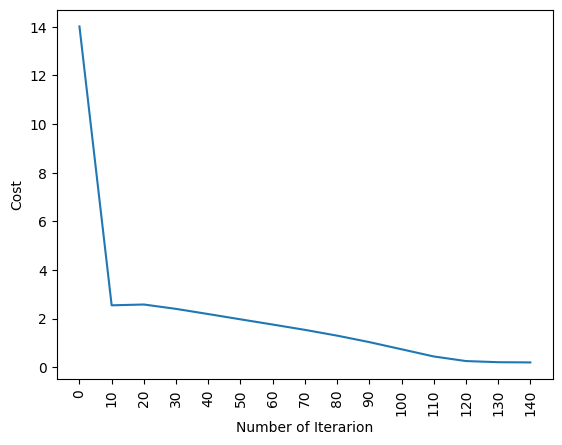

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [88]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_wb(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

# Logistic Regression with SKlearn

Sklearn library에서 제공하는 로지스틱회귀 모델 사용

In [89]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


# ANN

NN으로 불리는 이유: logistic regression이 최소 2회 반복

### Initialize param

In [99]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

### Forward Propagation

In [100]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)    #builtin함수
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

### Loss function (Compute Cost)

In [101]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

### Optimization - Back Propagation

In [102]:
def backward_propagation_NN(params, cache, X, Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(params["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [103]:
def update_parameters_NN(params, grads, learning_rate = 0.01):
    parameters = {"weight1": params["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": params["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": params["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": params["bias2"]-learning_rate*grads["dbias2"]}

    return parameters

### Model Train

In [104]:
def predict_NN(parameters,x_test):
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.416697
Cost after iteration 100: 0.304991
Cost after iteration 200: 0.255290
Cost after iteration 300: 0.208372
Cost after iteration 400: 0.170325
Cost after iteration 500: 0.141174
Cost after iteration 600: 0.119015
Cost after iteration 700: 0.101879
Cost after iteration 800: 0.088284
Cost after iteration 900: 0.077200
Cost after iteration 1000: 0.067956
Cost after iteration 1100: 0.060148
Cost after iteration 1200: 0.053533
Cost after iteration 1300: 0.047928
Cost after iteration 1400: 0.043166
Cost after iteration 1500: 0.039118
Cost after iteration 1600: 0.035683
Cost after iteration 1700: 0.032757
Cost after iteration 1800: 0.030246
Cost after iteration 1900: 0.028071
Cost after iteration 2000: 0.026171
Cost after iteration 2100: 0.024496
Cost after iteration 2200: 0.023008
Cost after iteration 2300: 0.021673
Cost after iteration 2400: 0.020465


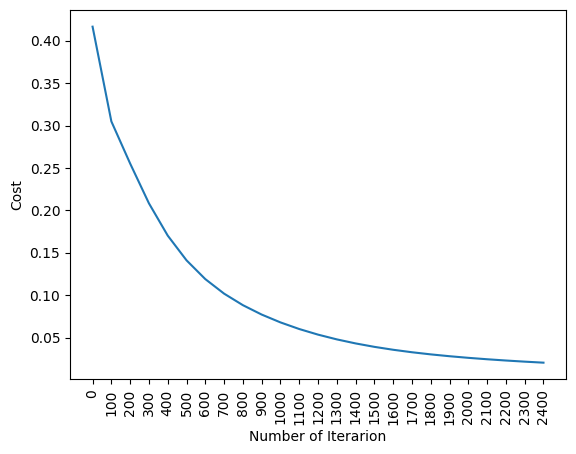

train accuracy: 99.71264367816092 %
test accuracy: 95.16129032258064 %


In [105]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        A2, cache = forward_propagation_NN(x_train,parameters)
        cost = compute_cost_NN(A2, y_train, parameters)
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        parameters = update_parameters_NN(parameters, grads)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()

    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

# L-Layer NN

In [106]:
# Keras 사용했는데, deprecated 된 것으로 보임. 그것과 별개로 Google Colab 런타임 초과되어서 실험 못 돌림.

In [113]:
!pip install scikeras

In [114]:
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from keras.models import Sequential
# from keras.layers import Dense
# def build_classifier():
#     classifier = Sequential()
#     classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
#     classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
#     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#     classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier
# classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
# accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
# mean = accuracies.mean()
# variance = accuracies.std()
# print("Accuracy mean: "+ str(mean))
# print("Accuracy variance: "+ str(variance))

ValueError: Found input variables with inconsistent numbers of samples: [4096, 1]